In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize_scalar

from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from itertools import chain
import random

from TwoLayerNet import TwoLayerNet, task_to_batch, two_layer_square_loss

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

## Generate data

In [130]:
# params
p = 200
c = 10
n = c * p
sigma = 0.5
t = 10 # number of tasks

# covariates
X = np.random.randn(n, p)

# models
beta_0 = np.random.randn(p, 1) / math.sqrt(p)
r = 1

## Get HPS estimators

In [131]:
#args.print_every = 20
#args.epochs = 1000
#args.lr = 0.02
#two_layer_square_loss(data_train, data_test, args)

def get_HPS_estimator(X, Y):
    A_hat = Y.T @ X @ np.linalg.inv(X.T @ X) @ X.T @ Y
    U, D, V = np.linalg.svd(A_hat)
    U = U[:, :r]
    BA_hat = np.linalg.inv(X.T @ X) @ X.T @ Y @ U @ U.T
    
    return BA_hat

In [132]:
#print('B_star', B_star)

#print('U', U)

#print(BA_hat - B_star)

## Get prediction loss

In [133]:
def get_avg_pred_loss(BA_hat):
    err = np.linalg.norm(BA_hat - B_star, 'fro') ** 2
    return err / t

## Vary total sample size

In [144]:
d = 0.2
B_star = beta_0 @ np.ones((1, t)) + d * np.random.randn(p, t) / math.sqrt(p)
Y = X @ B_star + sigma * np.random.randn(n, t)

n_list = [i * p for i in range(2, c + 1)]
emp_avg_loss_list = []

stl_list = []

for i in n_list:
    X_i = X[:i, :]
    Y_i = Y[:i, :]
    
    print(X_i.shape, Y_i.shape)
    
    stl_list.append(sigma**2 * np.trace(np.linalg.inv(X_i.T @ X_i)))
    
    BA_hat = get_HPS_estimator(X_i, Y_i)
    avg_loss = get_avg_pred_loss(BA_hat)
    emp_avg_loss_list.append(avg_loss)

thm_avg_loss_list = [(1 - r / float(t)) * d**2 + (float(r) / t) * (sigma**2 * p) / (i - p) for i in n_list]

(400, 200) (400, 10)
(600, 200) (600, 10)
(800, 200) (800, 10)
(1000, 200) (1000, 10)
(1200, 200) (1200, 10)
(1400, 200) (1400, 10)
(1600, 200) (1600, 10)
(1800, 200) (1800, 10)
(2000, 200) (2000, 10)


In [145]:
print(n_list)
print(emp_avg_loss_list)
print(thm_avg_loss_list)

print(stl_list)
print('stl', sigma**2 * p / (n-p))

d2_emp_avg_loss_list = emp_avg_loss_list
d2_thm_avg_loss_list = thm_avg_loss_list

[400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
[0.0617960123472977, 0.04927264168923495, 0.04529633894446366, 0.04259186210269621, 0.04115930823157653, 0.04018193094353069, 0.03978578363930427, 0.03944965092121796, 0.03893581763084674]
[0.06100000000000001, 0.048500000000000015, 0.04433333333333334, 0.04225000000000001, 0.04100000000000001, 0.04016666666666668, 0.039571428571428584, 0.039125000000000014, 0.038777777777777786]
[0.25125870658851385, 0.12514684982003432, 0.08335302508127518, 0.06248178851045614, 0.05004785357690277, 0.04170557948693311, 0.03573401379292146, 0.03117732623417423, 0.027725252072226092]
stl 0.027777777777777776


In [143]:
d1_emp_avg_loss_list = emp_avg_loss_list
d1_thm_avg_loss_list = thm_avg_loss_list

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


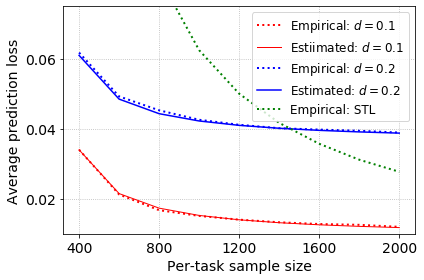

In [183]:
plt.figure(figsize=(6,4))

plt.plot(n_list, d1_emp_avg_loss_list, ls = ':', c='r', lw=2, label=r'Empirical: $d = 0.1$')
plt.plot(n_list, d1_thm_avg_loss_list, c='r', lw=1, label=r'Estiimated: $d = 0.1$')

plt.plot(n_list, d2_emp_avg_loss_list, ls = ':', c='b', lw=2, label=r'Empirical: $d = 0.2$')
plt.plot(n_list, d2_thm_avg_loss_list, c='b', label=r'Estimated: $d = 0.2$')

plt.plot(n_list, stl_list, c='g', ls = ':',lw=2, label='Empirical: STL')

plt.xticks(np.arange(400, 2400, 400), fontsize=14)
plt.yticks(np.arange(0.02, 0.08, 0.02), fontsize=14)
#plt.xlim([0,6])

plt.ylim([0.01, 0.075])

plt.xlabel('Per-task sample size', fontsize=14)
plt.ylabel('Average prediction loss', fontsize=14)
plt.grid(ls = ':', lw=0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('same_covariates.eps')

## Plot the effect of source task data size

In [ ]:
#1.0 - np.ndarray.flatten(np.array(cos_sim_list))

In [ ]:
te_beta_t - np.array(te_mtl_list)

In [ ]:
np.array(d_list)/sigma**2

In [ ]:
for a, b in zip(1000* np.array(provable_pos[0])/sigma**2, te_beta_t - np.array(provable_pos[1])):
    print(a, b)
print()

for a, b in zip(x_thy_neg, y_thy_neg):
    print(a, b)
print()

for a, b in zip(1000* np.array(unknown[0])/sigma**2, te_beta_t - np.array(unknown[1])):
    print(a, b)

In [ ]:
thy_neg = 1000* np.array(provable_neg[0])/sigma**2
print(thy_neg[:8])

In [ ]:
print(B_star)